In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from torchvision import models, transforms

from config import *
from screening import ATTRIBUTE_THRESHOLDS


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, len(SELECTED_ATTRS))

checkpoint = torch.load(
    "peta_resnet18_attributes.pth",
    map_location=device,
    weights_only=True
)
model.load_state_dict(checkpoint["model_state"])
model.to(device)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [4]:
image_path = r"E:\people-analytics\data\PETA\PETA dataset\CUHK\archive\0606.png"
image = Image.open(image_path).convert("RGB")

input_tensor = transform(image).unsqueeze(0).to(device)


In [5]:
with torch.no_grad():
    logits = model(input_tensor)
    probs = torch.sigmoid(logits).squeeze(0)

results = []
for i, attr in enumerate(SELECTED_ATTRS):
    if probs[i].item() >= ATTRIBUTE_THRESHOLDS[attr]:
        results.append(attr)


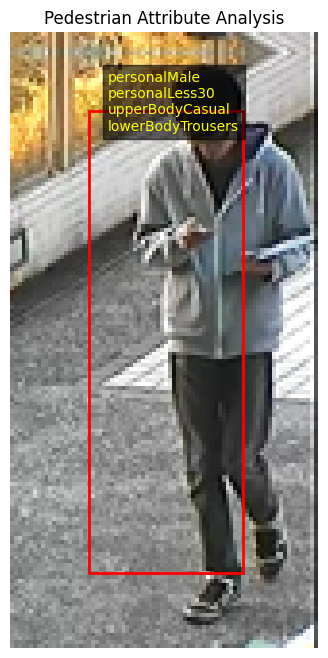

In [6]:
fig, ax = plt.subplots(1, figsize=(6, 8))
ax.imshow(image)
ax.axis("off")

# Dummy bounding box (since PETA images are already cropped persons)
box = patches.Rectangle(
    (20, 20),
    image.size[0] - 40,
    image.size[1] - 40,
    linewidth=2,
    edgecolor="red",
    facecolor="none"
)

ax.add_patch(box)

text = "\n".join(results)
ax.text(
    25, 25,
    text,
    color="yellow",
    fontsize=10,
    bbox=dict(facecolor="black", alpha=0.6)
)

plt.title("Pedestrian Attribute Analysis")
plt.show()


E2


In [7]:
image_path = r"E:\people-analytics\data\PETA\PETA dataset\CUHK\archive\0287.png"
image = Image.open(image_path).convert("RGB")

input_tensor = transform(image).unsqueeze(0).to(device)


In [8]:
with torch.no_grad():
    logits = model(input_tensor)
    probs = torch.sigmoid(logits).squeeze(0)

results = []
for i, attr in enumerate(SELECTED_ATTRS):
    if probs[i].item() >= ATTRIBUTE_THRESHOLDS[attr]:
        results.append(attr)


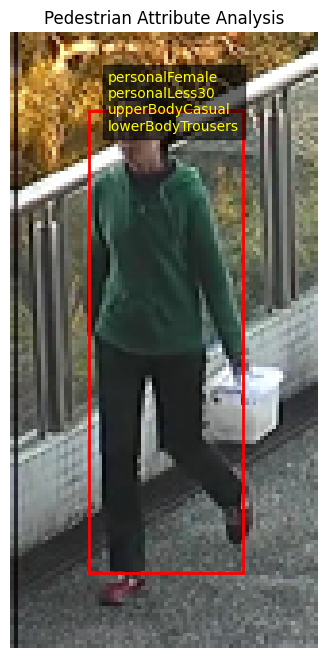

In [9]:
fig, ax = plt.subplots(1, figsize=(6, 8))
ax.imshow(image)
ax.axis("off")

# Dummy bounding box (since PETA images are already cropped persons)
box = patches.Rectangle(
    (20, 20),
    image.size[0] - 40,
    image.size[1] - 40,
    linewidth=2,
    edgecolor="red",
    facecolor="none"
)

ax.add_patch(box)

text = "\n".join(results)
ax.text(
    25, 25,
    text,
    color="yellow",
    fontsize=10,
    bbox=dict(facecolor="black", alpha=0.6)
)

plt.title("Pedestrian Attribute Analysis")
plt.show()


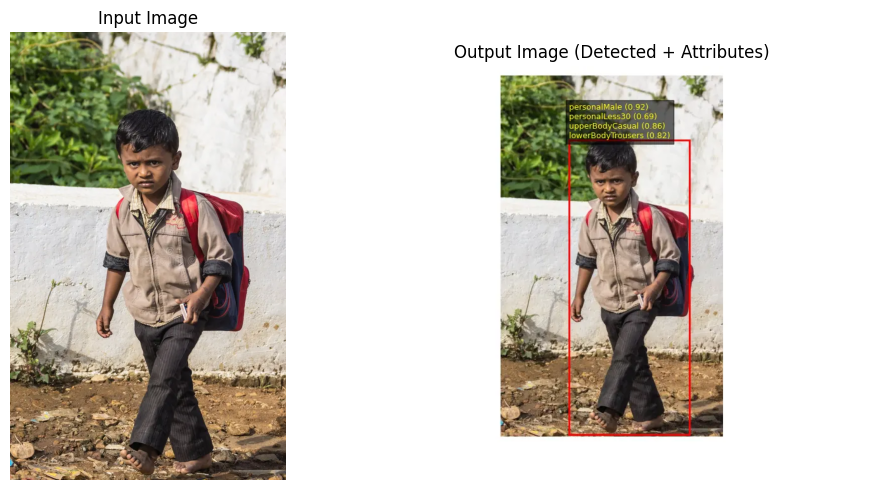

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths
input_image_path = "image.png"
output_image_path = "image_output.png"

# Load images
input_img = Image.open(input_image_path)
output_img = Image.open(output_image_path)

# Plot side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_img)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title("Output Image (Detected + Attributes)")
plt.axis("off")

plt.tight_layout()
plt.show()

